
<center>

_Luisa Fernanda Giraldo_ 

_Juan Sebastian Guzman - A00329120_

</center>

<center>

 #### __Introducción__ 
</center>

Como parte del ejercicio profesional de los científicos de datos, los modelos de aprendizaje supervisado están siempre presentes. Dentro de estos, los modelos de regresión lineal han representado una herramienta poderosa para comprender la relación entre fenómenos y predecir sucesos, agragando valor a través de la manera en la que ofrece información para la toma de decisiones y la gestión de los negocios. Este trabajo se propone reforzar los conceptos de regresión lineal y afinar las habilidades de sus autores como científicos de datos, convirtiéndose en una oportunidad para afianzar conceptos y ponerlos en práctica para nuestro futuro como profesionales en el campo. Abordaremos modelos de regresión lineal simple con y sin interacción así como modelos de regresión múltiple; hallamos los resultados a través de paquetes estadísticos de python así la aproximación matricial a los cálculos de los parámetros. Por último, discutiremos conceptualmente sobre el modelo de regresión logística. 
<center> 

__Conceptos Claves__: Modelo de regresion lineal, regresión lineal múltiple, prueba de hipótesis, regresión robusta, modelo con interacción, regresión logística. 

</center>

<center>

 #### __Summary__ 
</center>

Supervised learning models are always present in the daily lives of data scientists. Within these, linear regression models have represented a powerful tool for understanding the relationship between phenomena and predicting events, adding value by providing information for decision making and business management. This paper aims to reinforce the concepts of linear regression and sharpen the authors' skills as data scientists, becoming an opportunity to strengthen concepts and put them into practice for our future as professionals in the field. We will cover simple linear regression models with and without interaction as well as multiple regression models; we will find the results through Python statistical packages as well as the matrix approach to parameter calculations. Lastly, we wil conceptually discuss the logistic regression prediction approach. 
<center>

__Key terms__: Linear regression, multiple linear regression, hypothesis tests, robust regression, interaction model, log-linear regression.

</center>

Iniciamos importando las librerías necesarias para la resolución de los ejercicios propuestos. 

In [228]:
#Importamos librerias necesarias

import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Scaler estandar
from sklearn.preprocessing import StandardScaler

# Splitter para partir el dataset en entrenamiento/prueba
from sklearn.model_selection import train_test_split

### Ejercicio de regresión lineal con interacción

Procedemos a importar nuestro primer set de datos, con el que abordaremos el primer apartado de este documento.

In [229]:
#Importar el data set
df = pd.read_excel("D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Analisis Cuantitivo\Trabajo 1\data_exam1.xlsx",sheet_name='data1')

Continuamos con el análisis exploratorio, entendiendo la estructura del data set, estadísticas descriptivas de las variables y adelantando el análisis gráfico. 

In [230]:
#Se visualiza la estructura del dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


Se evidencia que no existen datos nulos para ninguan de las variables del dataset. Además, existen dos variables que toman valores decimales __"X"__ & __"Y"__, y la variable __"Ind"__ que toma valores enteros.  Procedemos a calcular las estadísticas descriptivas para el dataset. 

In [231]:
#Se calculan las estadísticas 
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


In [232]:
#Valores que puede tomar la variable Ind
df['Ind'].unique()

array([0, 1], dtype=int64)

Nos damos cuenta que __"Ind"__ es una variable categórica binaria, es decir, toma valores entre 0 & 1. Procedemos a graficar la matriz de dispersión para revisar graficamente la relación entre las variables. 

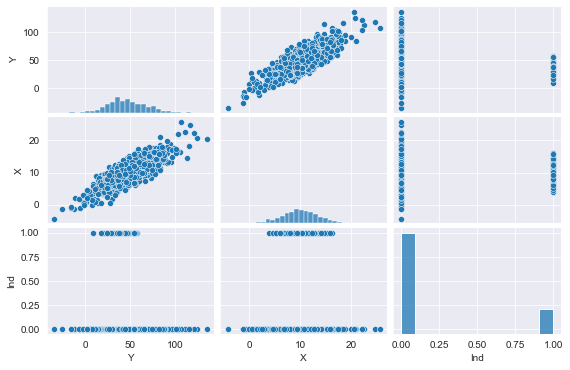

In [233]:
sn.pairplot(df)
plt.gcf().set_size_inches(8,5)


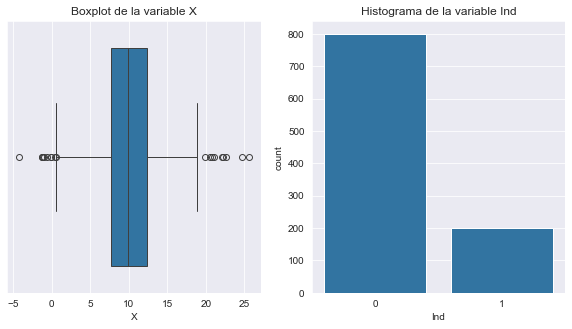

In [234]:

#Ordenación de los gráficos espacialmente en una matriz
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sn.boxplot(x='X', data=df, ax = axes[0]).set_title('Boxplot de la variable X') 
sn.countplot(x='Ind', data=df, ax = axes[1]).set_title('Histograma de la variable Ind')

#Seteo del estilo de los gráficos
sn.set_style('darkgrid')

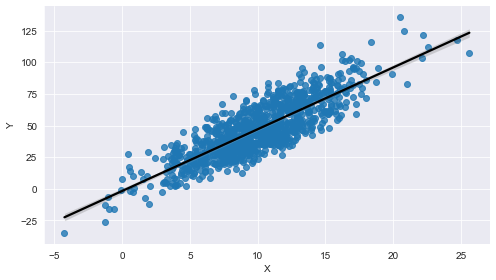

In [235]:
#Gráfico de dispersión con linea de regresión
sn.lmplot(data = df, x= 'X', y='Y', line_kws={'color':'black'}, height=4, aspect=7/4, palette= 'mako')

Al graficar las dos atributos, evidenciamos que para la variable __'X'__ existen un buen número de valores atípicos, tanto positivos como negativos; sin embargo, no parece presentar un sesgo significativo en la distribución de los datos, acercándose a una distribución normal. Por otro lado, para la variable __'Ind'__ vemos que es 4 veces el número de registros que reportan 0 para esta variable que los que reportan 1. 

Al graficar la relación entre las variables evidenciamos una distribución de las observaciones similar a una elipse, lo que preliminarmente nos llevaría a creer que existe una relación lineal positiva entre las variables, por lo podríamos plantear el uso de un modelo de regresión lineal para explicar y predecir el comportamiento de Y en función de X. podríamos

Ahora, debido a que los posible valores que toma la variable __'Ind'__ son (0,1), asumimos que estamos lidiando con una variable categórica de dos niveles, por lo que podríamos correr un modelo de regresión múltiple, con la variable __'Ind'__ como segunda variable predictora, tal que se plantea el modelo 

$$ \begin{align} 
y = \beta_0 + \beta_1X + \beta_2Ind + \epsilon = \left\{ 
    \begin{array}{ll}  \beta_0 + \beta_1X + \beta_2 + \epsilon & \text{si  Ind = 1} \\ 
    \beta_0 + \beta_1X + \epsilon & \text {si  Ind = 0} \end{array} \right. \end{align} $$

Así, podemos definir $\beta_1$ como el cambio medio de la variable Y por un cambio unitario de X, con todas las demás variables constantes; igualmente, podemos definir $\beta_2$ como a la agregación  al valor medio de Y cuando Ind toma el valor de 1. 

Procedemos a correr el modelo: 


In [236]:
x = df[['X','Ind']].assign(const=1) #Apartar variables dependientes + constante
y = df['Y'] # Variable independiente 

#Modelados
model = sm.OLS(y,x)

#Hacemos fit al modelo e imprimimos los resultados
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          2.25e-308
Time:                        19:33:17   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              4.9116      0.091     53.848      0.0

Al correr el OLS, nos encontramos con que el modelo lineal ajusta un 75.8% los datos, con un p_value < 0.05 que nos asegura la significancia del modelo. Los resultados arrojados por el modelo nos permite plantear el modelo

$$ \hat{Y} = \left\{ 
    \begin{array}{ll} (0.7873-14.1796) + 4.9116X & \text{si  Ind = 1} \\
    \ (0.7873) + 4.9116X & \text {si  Ind = 0} \end{array} \right. $$

Donde cada coeficiente lo podemos interpretar: 

$$ \hat{\beta_{0}} = 0.7873 \text{ como intercepto. Es valor medio de } \hat{Y} \text{ cuando las demás variables toman valor de 0} $$
$$ \hat{\beta_{1}} = 4.9116 \text{ Ante un cambio en 1 unidad de la variable X, el valor esperado de Y aumentaría 4.9116 } \\ \text{dejando todas las demás variables constantes. Es significativo con un p-value < 0.05} $$
$$ \hat{\beta_{2}} = -14.1796. \text{ El valor medio de } \hat{Y} \text{ se reduce en -14.1769 si el individuo registra una valor de 1 en la variable Ind, independientemente del valor que tome X.}\\
\text{Es decir, para los individuos con Ind = 1, el valor esperado medio de Y será de -13.3923 si X tomará el valor de 0}$$

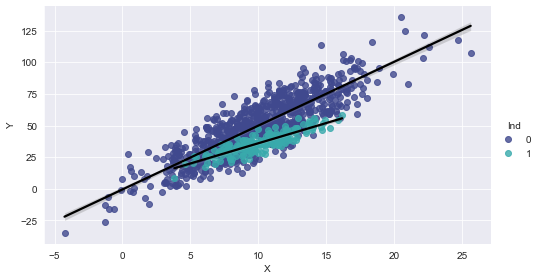

In [237]:
#Gráfico de dispersión con linea de regresión según el valor que tome Ind

sn.lmplot(data=df, x='X', y='Y', hue='Ind', line_kws={'color':'black'}, height=4, aspect=7/4, palette='mako')

Al realizar el gráfico de dispersión diferenciando cada punto por la variable __'Ind'__ evidenciamos que para ambos casos (0,1) parece existir una relación de dependencia positiva, sin embargo, los individuos cuyo atributo Ind = 1 parecen reportar valores de Y menores que los aquellos con Ind = 0, lo cual es coherente con lo visto en el modelo anterior (con $\beta_2 = -14.1796$). Debido a que el modelo anterior nos arrojó que la variable categórica es significativa para el modelo, podemos pensar en correr un modelo con interacción entre las variables __'X'__ e __'Ind'__, que lo podemos plantear como: 
 
$$ \begin{align} 
\hat{y} = \hat{\beta_0} + \hat{\beta_1}X + \hat{\beta_2}Ind + \hat{\beta_3}*X*Ind = \left\{ 
    \begin{array}{ll}  (\hat{\beta_0} +  \hat{\beta_2})+ (\hat{\beta_1} + \hat{\beta_3})X & \text{si  Ind = 1} \\ 
    \hat{\beta_0} + \hat{\beta_1}X & \text {si  Ind = 0} \end{array} \right. \end{align} $$

El planteamiento de este modelo nos muestra no solo un cambio en el intercepto sino también un cambio en la pendiente del modelo, de manera que nos permita probar si ante un cambio en 1 unidad de X, esta variable termina afectando de manera distinta a los individuos dependiendo del valor que tome la variable __'Ind'__. 

In [238]:
# Generamos la variable interacción
interaccion = df['X']*df['Ind']
df['Interaccion'] = interaccion

df.head()

,Y,X,Ind,Interaccion
0,66.199147,12.653765,0,0.000000
1,44.311301,8.204418,0,0.000000
2,48.390783,8.768596,0,0.000000
3,58.087413,16.169568,1,16.169568
4,60.708671,9.980310,0,0.000000


In [239]:
#Corremos el modelo con la interacción
x_inter = df[['X','Ind', 'Interaccion']].assign(const=1)
y_inter = df['Y']

#Modelamos
model_inter = sm.OLS(y_inter,x_inter)

#Hacemos fit e imprimimos resultados
results_inter = model_inter.fit()
print(results_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.34e-312
Time:                        19:33:18   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
X               5.0411      0.093     53.997      

Al correr el modelo con la interacción evidenciamos que el ajuste del modelo mejora, pasando de un 75.8% a 76.4% con un p_value del modelo menor a 0.05. Sin embargo, vemos que la variable de Ind que en el modelo anterior era significativa deja de tener significancia y, en cambio, la la interacción entre las dos variable cuenta con un p_value<0.05. Volvemos a correr el modelo sin la variable Ind y revisamos sus resultados

In [240]:
#Corremos el modelo con la interacción eliminando la variable categórica Ind como predictor solo
x_inter2 = df[['X', 'Interaccion']].assign(const=1)
y_inter2 = df['Y']

model_inter2 = sm.OLS(y_inter2,x_inter2)

results_inter2 = model_inter2.fit()
print(results_inter2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1620.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          6.34e-314
Time:                        19:33:18   Log-Likelihood:                -3788.2
No. Observations:                1000   AIC:                             7582.
Df Residuals:                     997   BIC:                             7597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
X               5.0120      0.090     55.465      

Al correr nuevamente el modelo sin la variable __'Ind'__ vemos que no hay un cambio en el porcentaje de ajuste, sin embargo, nos deshacemos de variables que no son significativas para el modelo. Por lo mismo, se puede concluir que la interacción entre la variable __'Ind'__ & __'X'__ nos conduce generar un modelo que explica y predice de mejor manera los valores de Y. Por tanto, planteamos el modelo e interpretamos los coeficientes.

$$ \begin{align} 
\hat{y} = \hat{\beta_0} + \hat{\beta_1}X + \hat{\beta_3}*X*Ind = \left\{ 
    \begin{array}{ll} \hat{\beta_0}+ (\hat{\beta_1} + \hat{\beta_3})X & \text{si  Ind = 1} \\ 
    \hat{\beta_0} + \hat{\beta_1}X & \text {si  Ind = 0} \end{array} \right. \end{align} $$

$$ \begin{align} 
 = -0.1611 + 5.0120*X + -1.4219*X*Ind = \left\{ 
    \begin{array}{ll} -0.1611+ 3.5901*X & \text{si  Ind = 1} \\ 
    -0.1611 + 5.0120*X & \text {si  Ind = 0} \end{array} \right. \end{align} $$

De esta manera, podemos concluir que ante un cambio unitario en X el impacto medio en Y es distinto dependiendo del valor que tome la variable __'Ind'__. Así, 

$$ 
\hat{\beta_1} : 5.0120. \text{ y aumenta en promedio 5.0120 cuando X cambia en una unidad, dado si la variable Ind toma el valor de 0} \\
(\hat{\beta_1} + \hat{\beta_3}) : 3.5901. \text{ y aumenta en promedio 3.5901 cuando X cambia en una unidad, siempre que la variable Ind tome valor 1}
$$

Es decir, los individuos que reportan 1 en el atributo indicador perciben un menor impacto ante cambios en X que aquellos que tiene 0 asignado. No hay cambios en el intercepto, pues la variable Ind por sí sola no es significativa para el modelo. 

#### Prueba de supuestos del modelo

Una vez planteado el modelo, procedemos a validar cada uno de los supuestos del modelo.

$$ \epsilon_i \overset{iid}\sim N(0, \sigma^2) $$

1. Independencia de los errores

$$ H_0: \rho(\epsilon_{i}, \epsilon_{i+1}) = 0 \\
H_1: \rho(\epsilon_{i}, \epsilon_{i+1}) \neq 0 $$


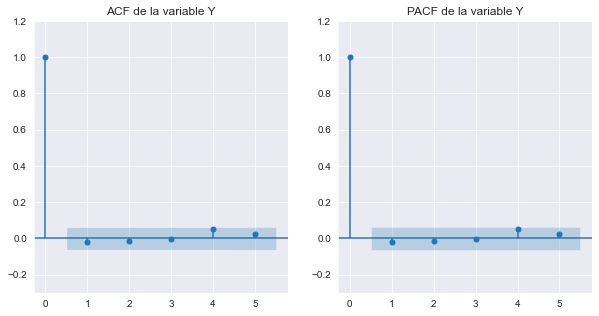

In [241]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Test grafico de autocorrelaciones
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_acf(y_inter2, ax=ax[0], lags=5, title="ACF de la variable Y", alpha=0.05)
plot_pacf(y_inter2, ax=ax[1], lags=5, title="PACF de la variable Y", alpha=0.05)

ax[0].set_ylim([-0.3, 1.2])
ax[1].set_ylim([-0.3, 1.2])

plt.subplots_adjust()
plt.show()

Al construir el grafico de autocorrelación simple y autocorrelación parcial de la variable dependiente, aparentemente vemos que, con un lag de 5 datos, solo el primero es significativo y nos llevaría a pensar que existe independencia de los errores. Además, al correr el modelo nos arroja un valor de Durbin - Watson de 1.986, muy cerca del 2 ideal, lo que nos reforzaría la idea de no autocorrelación. 

Corremos la prueba de Breusch - Godfrey definiendo el método y presentando una tabla de validación de hipótesis, que se definen así: 


In [242]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan, het_white

# Test Breusch Godfrey
def test_breusch_godfrey(model_results, maxlags):
    list = []

    for i in range(1, maxlags+1):
        values = acorr_breusch_godfrey(model_results, nlags=i)
        list.append([i, values[0], values[1]])
    
    table = pd.DataFrame(list, columns=["lags", "LM", "pvalue"])
    table.set_index("lags", inplace=True)
    
    # P-value < pvalue 
    table[f"pv<0.1"] = table["pvalue"]<0.1
    table[f"pv<0.05"] = table["pvalue"]<0.05
    table[f"pv<0.01"] = table["pvalue"]<0.01

    # Rounding
    table["LM"] = np.round(table["LM"], 3)
    table["pvalue"] = np.round(table["pvalue"], 3)

    return table


# La hipotesis nula es de no autocorrelacion
# Se rechaza la no autocorrelacion hasta 3 rezagos. 
test_breusch_godfrey(results_inter2, maxlags=3)

,LM,pvalue,pv<0.1,pv<0.05,pv<0.01
lags,,,,,
1,0.050,0.823,False,False,False
2,1.864,0.394,False,False,False
3,3.396,0.335,False,False,False


Al correr el test de Breusch - Godfrey hasta en 3 rezagos podemos aceptar la hipótesis nula y concluir que los errores son independiente, por lo mismo no existe evidencia de __autocorrelación__.

2. Continuamos con validación de la varianza constante de los errores.

$$ H_0: \mathbb{V}(\epsilon_{i}) = Constante \\
H_1: \mathbb{V}(\epsilon_{i})  \neq Constante $$

Text(0, 0.5, 'Residuo')

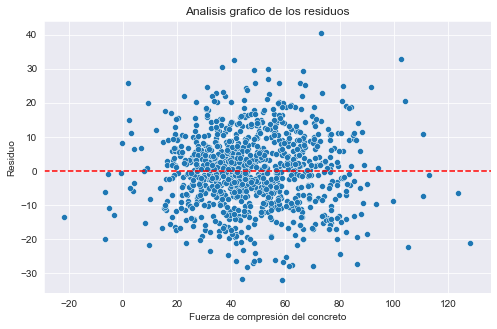

In [243]:
# Test gráfico
y_hat = results_inter2.predict(x_inter2)
resid = results_inter2.resid

sn.scatterplot(x=y_hat, y=resid)
plt.gcf().set_size_inches(8,5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Analisis grafico de los residuos")
plt.xlabel("Fuerza de compresión del concreto")
plt.ylabel("Residuo")

In [244]:
# Test Breusch - Pagan
BP_test = het_breuschpagan(resid, results_inter2.model.exog)
BP_test = np.round(BP_test, 3)

# H0: homocedasticidad en los errores
# H1: heterocedasticiadad en los erroes

print(f"El estadistico Breusch - Pagan es {BP_test[0]} y el p-value es {BP_test[1]}")

#Test de White
white_test = het_white(resid, results_inter2.model.exog)
labels = ['Estadístico White', 'p-value', 'F-Statistic', 'F-Test p-value']
white_test = np.round(white_test, 3)

# H0: homocedasticidad en los errores
# H1: heterocedasticiadad en los erroes

print(dict(zip(labels, white_test)))


El estadistico Breusch - Pagan es 80.02 y el p-value es 0.0
{'Estadístico White': 83.151, 'p-value': 0.0, 'F-Statistic': 22.56, 'F-Test p-value': 0.0}


Ambas pruebas nos dan un p-value menor a 0.05, lo que nos lleva a rechazar la hipótesis nula y concluir que el modelo presenta heterocedasticidad, es decir, la varianza de los errores no es constante.  

3. Errores se distribuyen de manera normal. Adelantamos análisis gráfico y las pruebas de bondad de ajuste de D'Angostino y Jarque Bera. 

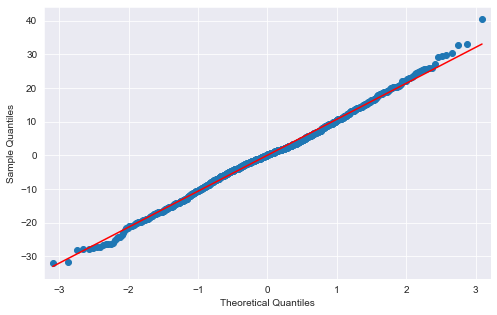

In [245]:
import statsmodels.api as sm

#Test gráfico de normalidad
sm.qqplot(resid, line = 's')
plt.gcf().set_size_inches(8,5)
plt.show()

In [246]:
from scipy.stats import normaltest

#Test 2 de bondad de ajuste
k2, p_value = normaltest(resid)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 3.9803027284582315, p-value = 0.13667473621367196


Al graficar la tendencia de los errores, evidenciamos que este se acerca mucho a la normalidad. Analizamos el p - valor del test de Jarque - Bera y de la prueba de D'Angostino, los cuales están por encima del 0.05, lo que conlleva a aceptar la hipótesis nula de normalidad de los residuos. 

### Modelo de regresion lineal con transformación de variables

 Para este numeral, se realiza un análisis univariante y bivariante al conjunto de datos del fichero Data_Exam1.xlsx. Posteriormente, se realiza una transformación mediante la función logarítmica natural de la Variable "X",  con base en el  comportamiento entre las variables  "X" y "Y", observado mediante un acercamiento gráfico.

In [247]:
#lectura del Data set
df2 = pd.read_excel("D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Analisis Cuantitivo\Trabajo 1\data_exam1.xlsx", sheet_name="data2")
df2.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


En un primer acercamiento univariante a los datos mediante la función "describe" de Pandas, y complementándolo con una revisión gráfica por medio de diagramas de cajas para el comportamiento de los datos de las variables "X" y "Y", se resaltan los siguientes puntos:

<br>

*Variable X*
<br>
Los valores de la variable X, presentan un valor medio de 0.07234, con una desviación estándar de 0.09753.

*El primer cuartil (25%) es aproximadamente 0.0085.
<br>
*La mediana de X (50%) es aproximadamente 0.0366.
<br>
*El tercer cuartil (75%) de los valores de X es aproximadamente 0.0999.
<br>
*El valor máximo de "X" es aproximadamente 0.9397, lo que sugiere que hay valores muy grandes presentes en los datos.
<br>

Mediante los datos anteriores y complementando con la información gráfica presentada en los sigientes gráficos, se resalta para los valores de X que: presentan una distribución sesgada hacia la derecha, que la  media (0.07234) es significativamente mayor que la mediana (0.0366) y que hay presencia de valores atípicos considerablemente superiores en el último cuartil.

<br>

*Variable Y*
<br>
Los valores de la variable "Y", presentan un valor medio de 9.4456, con una desviación estándar de 3.90818.

El 25% de los datos de Y están por debajo de aproximadamente 7.41, el 50% de los datos de Y están por debajo de aproximadamente 10.07, y el 75% de los datos de "Y" están por debajo de aproximadamente 12.08.

Mediante los datos anteriores y complementando con la información gráfica presentada en los sigientes gráficos, se resalta para los valores de Y que: presentan una distribución sesgada hacia la izquierda, se encuentran valores atípicos significativamente menores en el primer cuartil. 

In [248]:
df2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


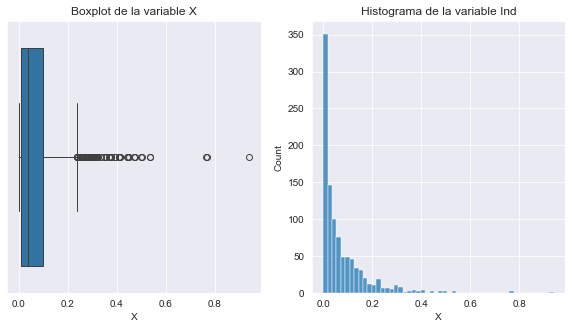

In [249]:
#Ordenación de los gráficos espacialmente en una matriz
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sn.boxplot(x='X', data=df2, ax = axes[0]).set_title('Boxplot de la variable X') 
sn.histplot(x='X', data=df2, ax = axes[1]).set_title('Histograma de la variable Ind')

#Seteo del estilo de los gráficos
sn.set_style('darkgrid')

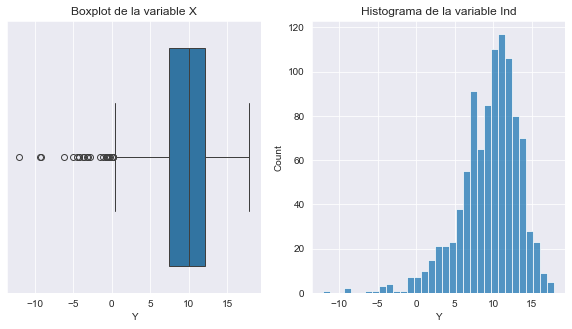

In [250]:
#Ordenación de los gráficos espacialmente en una matriz
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sn.boxplot(x='Y', data=df2, ax = axes[0]).set_title('Boxplot de la variable X') 
sn.histplot(x='Y', data=df2, ax = axes[1]).set_title('Histograma de la variable Ind')

#Seteo del estilo de los gráficos
sn.set_style('darkgrid')

Continuamos con el análisis bivariante: 

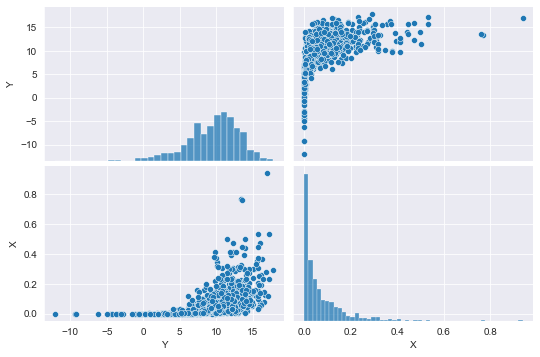

In [251]:
sn.pairplot(df2[["Y", "X"]])
plt.gcf().set_size_inches(8,5)

In [252]:
## calculando la correlación de pearson
print("============== Pearson =============")
print(df2.corr(method = "pearson"))

print("============== spearman =============")
### calculando la correlación de spearman
print(df2.corr(method = "spearman"))

print("============== kendall =============")
### calculando la correlación de kendall
print(df2.corr(method = "kendall"))

============== Pearson =============
          Y         X
Y  1.000000  0.520376
X  0.520376  1.000000
============== spearman =============
          Y         X
Y  1.000000  0.767833
X  0.767833  1.000000
============== kendall =============
          Y         X
Y  1.000000  0.580777
X  0.580777  1.000000


Se calculan las matrices de correlación, buscando información sobre la relación entre las variables X y Y.

*__Correlación de Pearson__: Se obtiene una correlación de 0.52, sugiriendo una relación moderada positiva entre "X" y "Y".

*__Correlación de Spearman__: Se obtiene una correlación 0.77, sugiriendo una correlación fuerte y positiva entre "X" y "Y".

*__Correlación de Kendall__: Se obtiene una correlación 0.58, sugiriendo una correlación moderada y positiva entre "X" y "Y".

Los resultados indican una correlación positiva entre las variables Y y X. La fuerza de esta correlación varía ligeramente según el método utilizado, pero en general, sugiere que existe una relación positiva entre las dos variables

Continuamos con la transformación de la variable independiente para la corrida del modelo. 

In [253]:
# Aplicar la transformación logarítmica a la variable X
df2['X_log'] = np.log(df2['X'])

In [254]:
import statsmodels.api as sm

# Ajustar el modelo de regresión lineal
X = df2[['X_log']]  # Variable explicativa
y = df2['Y']        # Variable objetivo

# Agregar intercepto al conjunto de datos
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2726.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.29e-287
Time:                        19:33:20   Log-Likelihood:                -2123.1
No. Observations:                1000   AIC:                             4250.
Df Residuals:                     998   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1706      0.127    119.481      0.0

Se aplica una transformación logarítmica a la variable 'X' utilizando la función logarítmica natural. Posterior a esta transformación, se procede a ajustar un modelo de regresión lineal mediante el método de mínimos cuadrados ordinarios (OLS), utilizando la variable transformada 'X_log' como variable explicativa y la variable 'Y' como variable objetivo.
<br>
<br>

De los valores obtenidos, se obtiene que la siguiente, es la función estimada que describe la relación entre la variable de respuesta Y y la variable explicativa X, según el modelo de regresión lineal ajustado.

$\hat{Y} =β₀ +β₁ ⋅Xlog​$

Donde:
<center>

$\hat{Y}$ es la variable de respuesta (Y) estimada.

β₀  es el coeficiente de intersección (constante).


β₁ es el coeficiente asociado con la variable explicativa X_log

</center>
Encontrando que la siguiente es la función estimada de Y en función de X

$$ \hat{Y}=15.1706+1.4987⋅ln(X) $$

Una vez corrido el modelo, intepretamos los estadísticos que nos arroja: 

__Coeficiente (coef)__: El coeficiente para la variable X_log es 1.4987. Esto sugiere que, en promedio, un aumento unitario en X_log está asociado con un aumento de aproximadamente 1.4987 unidades en Y.

<br>

__Valores p (P>|t|)__: El valor p obtenido en el modelo, para el coeficiente de X_log es 0.000, lo que sugiere que el efecto de X_log en Y es estadísticamente significativo.
<br>

__R-cuadrado__: El modelo arroja un valor de R-cuadrado de 0.732, indicando que aproximadamente el 73.2% de la variabilidad en la variable de respuesta (Y) es explicada por la variable explicativa (X_log).
<br>

__F-statistic__ y __valor p asociado__ : Se obtiene un valor p asociado significativamente bajo (1.29e-287), indicando que el modelo es estadísticamente significativo.

#### Validación de los supuestos del modelo

A continuación, se presenta la evaluación de los supuestos del modelo, encontrando que no hay evidencia para rechazar ningun de los supuestos  frente a los residuales.

In [255]:
residuals = model.resid

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes,  Promedio de los  𝓔ᵢ= 0 y presentan varianza constante

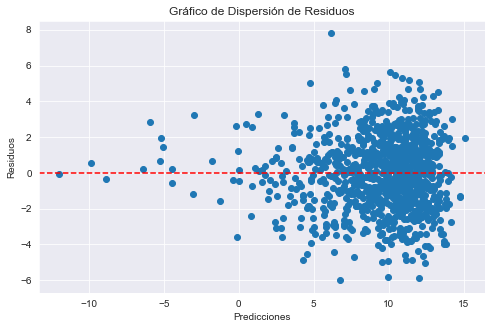

In [256]:
predictions = model.predict(X)

plt.scatter(predictions, residuals)
plt.gcf().set_size_inches(8,5)
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, no muestran un comportamiento constante al rededor del cero, especificamente, para valores mayores en el eje X, se observan mayor valores de residuo,  pareciera que los residuos están indicando  heterocedasticidad, es decir, que la varianza de los errores no es constante a lo largo del rango de predicciones.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [257]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Calcula el test de Breusch-Pagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X)

# Imprime los resultados
print("LM Estadístico:", lm)
print("P-valor LM:", lm_p_value)
print("F Estadístico:", fvalue)
print("P-valor F:", f_p_value)

LM Estadístico: 0.5282662931659354
P-valor LM: 0.46733665913366673
F Estadístico: 0.5274884149292246
P-valor F: 0.46783499688166175


Los resultados del test de Breusch-Pagan muestran que el estadístico LM es 0.528 y el valor p asociado es 0.467 para el estadístico LM. Además, el estadístico F es 0.527 con un valor p asociado de 0.468.

Dado que los valores p para ambos estadísticos, son mayores que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad en los residuos. Los residuos parecen tener una varianza constante, lo que sugiere que no hay heterocedasticidad en el modelo.

In [258]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuos)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 1.9819250655292384


Dado que el valor obtenido para el estadístico de Durbin-Watson es aproximadamente 1.98, está cerca de 2, pareciera que no hay autocorrelación de primer orden en los residuos. En consecuencia, los residuos parecen ser independientes entre sí.

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

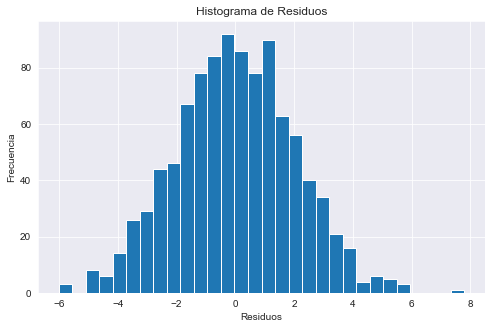

In [259]:
plt.hist(residuals, bins=30)
plt.gcf().set_size_inches(8,5)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

In [260]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuals)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9991617550230457
P-valor: 0.9427671920709753
No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.


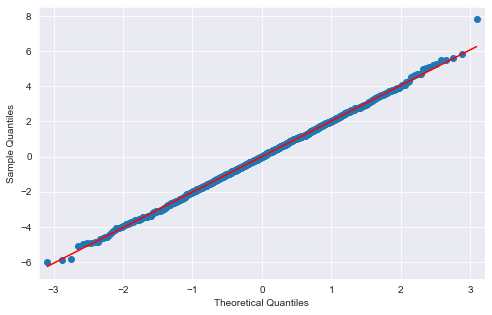

In [261]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuals, line='s')
plt.gcf().set_size_inches(8,5)
# Mostrar el gráfico
plt.show()

Considerando el acercamiento gráfico de los residuales del modelo, mediante el histograma de los residuales y el diagrama QQPlot, se pueden apreciar comportamientos de los residuales que se aproximan a una distribución Normal.
se realizó el test de Shapiro-Wilk, obteniendo un valor p de 0.943. Dado que este valor p es superior al nivel de significancia establecido, no se puede rechazar la hipótesis nula de normalidad. Por lo tanto, se concluye que los residuos se distribuyen de manera normal

### Ejercicio de regresión lineal con cálculo matricial

In [262]:
#Se excluyen dos filas ya que la primera fila se trata del título, y segunda fila es un espacio en blanco
df3 = pd.read_excel("D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Analisis Cuantitivo\Trabajo 1\datos.xls", sheet_name="Wine Quality", skiprows=2)
df3.head()

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [263]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calidad del Vino         4898 non-null   int64  
 1   Acidez Fija              4898 non-null   float64
 2   Acidez Volátil           4898 non-null   float64
 3   Ácido Cítrico            4898 non-null   float64
 4   Azúcar Residual          4898 non-null   float64
 5   Cloruros                 4898 non-null   float64
 6   Dióxido de Azúfre Libre  4898 non-null   float64
 7   Dióxido de Azúfre Total  4898 non-null   float64
 8   Densidad                 4898 non-null   float64
 9   pH                       4898 non-null   float64
 10  Sulfatos                 4898 non-null   float64
 11  Alcohol                  4898 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [264]:
columnas_a_excluir = ["pH", "Sulfatos", "Cloruros", "Acidez Volátil", "Acidez Fija", "Calidad del Vino"]

# Crear un nuevo DataFrame excluyendo las columnas especificadas
df3 = df3.drop(columns=columnas_a_excluir)

columnas_ordenadas = ["Densidad"] + [col for col in df3.columns if col != "Densidad"]
df3 = df3[columnas_ordenadas]

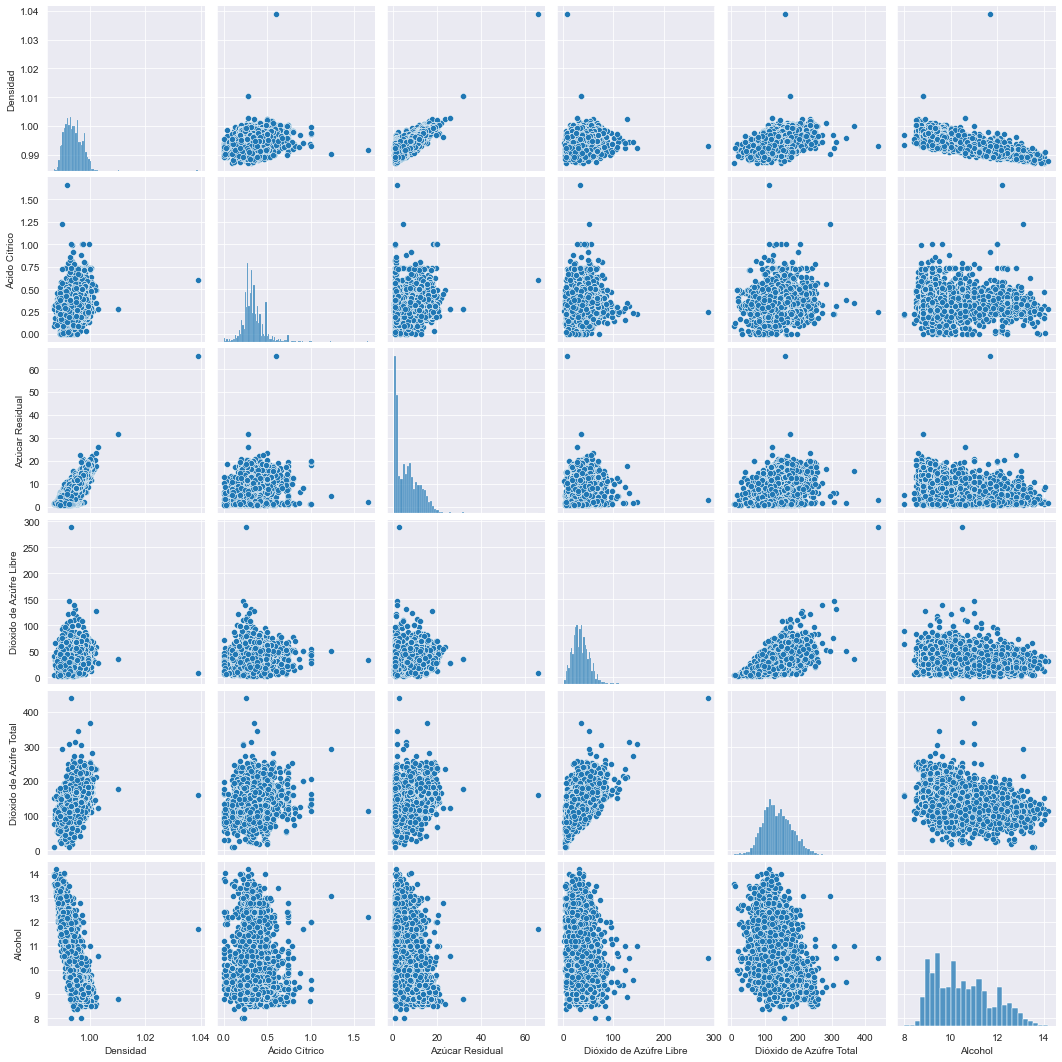

In [265]:
sn.pairplot(df3)

In [266]:

X_train, X_test, y_train, y_test = train_test_split(df3.drop("Densidad", axis = 1), df3["Densidad"], test_size=0.2, random_state=42)

In [267]:
y_train.values.reshape(-1,1)

array([[0.99272],
       [0.9968 ],
       [0.99268],
       ...,
       [0.99129],
       [0.99567],
       [0.99255]])

Estandarizamos las variables, lo que nos garantiza que la matriz de covarianza se calculará estandarizada, es decir, calcularemos los indices de correlación. 

In [268]:
#Estandarización de las variables
scalerX = StandardScaler() ### Esta linea instancia la clase que va a calcular la estandarización
scalerX.fit(X_train) ### Ajustamos el scaler a nuestros datos df
datosX_scaled = scalerX.transform(X_train) ### Así calculo la estandarización de los datos
dfX_scaled = pd.DataFrame(datosX_scaled, columns = X_train.columns)
dfX_scaled.head()


,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
0,0.227731,0.340419,0.534065,-0.641932,1.540371
1,0.895832,1.002071,0.773947,1.355106,-0.821712
2,-0.022807,0.184737,-0.605377,-1.022320,0.481506
3,0.144218,-0.924503,-0.125612,-0.879675,0.237153
4,-0.607396,2.432407,0.054300,0.855846,-0.088652


In [269]:

scalerY = StandardScaler()
scalerY.fit(y_train.values.reshape(-1,1))
datosY_scaled = scalerY.transform(y_train.values.reshape(-1,1)) ### Así calculo la estandarización de los datos
datosY_scaled

array([[-0.44704073],
       [ 0.90336975],
       [-0.46028004],
       ...,
       [-0.92034636],
       [ 0.52935901],
       [-0.50330783]])

In [270]:
#Mediante la matriz de covarianzas, se valida que los datos están estandazarizdos, se obtienen 1 en la diagonal
dfX_scaled.cov()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
Ácido Cítrico,1.000255,0.092536,0.098112,0.122396,-0.062996
Azúcar Residual,0.092536,1.000255,0.306096,0.406054,-0.453598
Dióxido de Azúfre Libre,0.098112,0.306096,1.000255,0.614348,-0.257323
Dióxido de Azúfre Total,0.122396,0.406054,0.614348,1.000255,-0.454558
Alcohol,-0.062996,-0.453598,-0.257323,-0.454558,1.000255


In [271]:
datosY_scaled.reshape(1, -1)

array([[-0.44704073,  0.90336975, -0.46028004, ..., -0.92034636,
         0.52935901, -0.50330783]])

In [272]:
#Se ubica a la variable Densidad como primer Variable de izquierda a derecha dentro del conjunto del dataset
df_scaled = dfX_scaled
df_scaled["Densidad"] = datosY_scaled.reshape(1, -1)[0]

df_scaled = df_scaled[["Densidad", "Ácido Cítrico", "Azúcar Residual", "Dióxido de Azúfre Libre","Dióxido de Azúfre Total","Alcohol"]]

# Cambiar los nombres de las columnas
df_scaled = df_scaled.rename(columns={"Dióxido de Azúfre Libre": "DióxidoAL", "Ácido Cítrico": "ÁcidoC", "Azúcar Residual": "AzúcarR",
                                      "Dióxido de Azúfre Total": "DióxidoZT"})

# Reordenar las columnas
df_scaled = df_scaled[["Densidad", "ÁcidoC", "AzúcarR", "DióxidoAL", "DióxidoZT", "Alcohol"]]

df_scaled.head()

,Densidad,ÁcidoC,AzúcarR,DióxidoAL,DióxidoZT,Alcohol
0,-0.447041,0.227731,0.340419,0.534065,-0.641932,1.540371
1,0.903370,0.895832,1.002071,0.773947,1.355106,-0.821712
2,-0.460280,-0.022807,0.184737,-0.605377,-1.022320,0.481506
3,-0.304718,0.144218,-0.924503,-0.125612,-0.879675,0.237153
4,1.883079,-0.607396,2.432407,0.054300,0.855846,-0.088652


Una vez tenemos las variables estandarizadas, procedemos a hacer el cálculo de coeficientes a través de la solución matricial. 

In [273]:
## calculando la correlación de pearson
print("============== Pearson =============")
print(df_scaled.corr(method="pearson").round(3))  # Redondear a 2 cifras decimales

print("============== spearman =============")
### calculando la correlación de spearman
print(df_scaled.corr(method="spearman").round(3))  # Redondear a 2 cifras decimales

print("============== kendall =============")
### calculando la correlación de kendall
print(df_scaled.corr(method="kendall").round(3))  # Redondear a 2 cifras decimales

============== Pearson =============
           Densidad  ÁcidoC  AzúcarR  DióxidoAL  DióxidoZT  Alcohol
Densidad      1.000   0.143    0.843      0.300      0.532   -0.775
ÁcidoC        0.143   1.000    0.093      0.098      0.122   -0.063
AzúcarR       0.843   0.093    1.000      0.306      0.406   -0.453
DióxidoAL     0.300   0.098    0.306      1.000      0.614   -0.257
DióxidoZT     0.532   0.122    0.406      0.614      1.000   -0.454
Alcohol      -0.775  -0.063   -0.453     -0.257     -0.454    1.000
============== spearman =============
           Densidad  ÁcidoC  AzúcarR  DióxidoAL  DióxidoZT  Alcohol
Densidad      1.000   0.088    0.781      0.329      0.565   -0.823
ÁcidoC        0.088   1.000    0.026      0.092      0.094   -0.021
AzúcarR       0.781   0.026    1.000      0.345      0.429   -0.449
DióxidoAL     0.329   0.092    0.345      1.000      0.622   -0.275
DióxidoZT     0.565   0.094    0.429      0.622      1.000   -0.479
Alcohol      -0.823  -0.021   -0.449     

Considerando los valores obtenidos en las matrices de correlación, se resaltan las siguientes observaciones sobre las estructuras de dependencia entre las variables:

***En la matriz de correlación de Pearson:***
<br>
*La densidad parece estar altamente correlacionada con el azúcar residual (0.843) y moderadamente correlacionada con el dióxido de azufre libre (0.300) y el dióxido de azufre total (0.532). Además, muestra una correlación negativa fuerte con el alcohol (-0.775).

*El alcohol parece estar negativamente correlacionado con la densidad (-0.775).
Las otras correlaciones son relativamente bajas.
<br>

***En la matriz de correlación de Spearman:***
Se observan patrones similares a la matriz de correlación de Pearson, pero las correlaciones tienden a ser ligeramente menores.

La densidad aún muestra una alta correlación con el azúcar residual (0.781) y correlaciones negativas fuertes con el alcohol (-0.823).

***En la matriz de correlación de Kendall:***
Los patrones generales son similares a las matrices anteriores, pero las correlaciones tienden a ser más bajas.

En resumen, las estructuras de dependencia observadas en la

#### Modelo de regresión lineal

Dado que los datos del modelo de regresión se encuentran estandarizado, se procede a  calcular los coeficientes regresión directamente con la matrix de correlaciones $C$ de la sigueinte forma

$$\beta_{1\ldots p}=C_{XX}^{-1}C_Xy \hspace{1 cm} \beta_0=0$$

Partiendo de los datos estandarizados, y tomando como variable respuesta Columna Densidad, se han construído 3 modelos RLM partiendo de las matrices de correlación calculadas mediante los métodos Pearson, Kendall y Spearman.

Para los 3 modelos se calcula el RMSE de la predicción, obteniendo los siguientes valores para cada modelo, encontrado que el Modelo calculado a partir de la matriz de correlación de kendall, reduce las desviaciones de las predicción del modelo, respecto a los valores reales, comparados con los otros dos modelos RLM calculados.

<br>
RMSE (Pearson)= 1.3863748432263951
<br>
RMSE (Kendall)= 1.2968506359111867
<br>
RMSE (Spearman)= 1.3875694897018205
<br>

Ninguno de los tres modelos de RLM calculados, cumplen los supuestos.


In [274]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación

#Definimos una función que permita hacer el cálculo de los coeficientes mediante diferentes métodos

def RLC(df_scaled, method_name):

  C = df_scaled.corr(method = method_name)

  CXX = C.to_numpy()[1:, 1:] #Definición de la matriz CXX No considera la primera columna ni la primera fila, la cual hace referencia a la variable "Densidad" que es la variable respuesta

  CXy = C.to_numpy()[1:, 0] #Definición del Vecto CXY Vector de correlación de las variables de entrada respecto a la variable respuesta

  betas = np.matmul(np.linalg.inv(CXX), CXy) #Cálculo de los Betas

  return betas

Calculamos los coeficientes del modelo usando Spearman

In [275]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación
#Método Spearman
#B0=0 considerando que los datos están estandarizados

betas = RLC(df_scaled, "spearman")
betas
#Los valores de Beta mayores, representan mayor dependencia a la variable

# Imprimir el mensaje en pantalla
print("La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, ")
print("y= "+"β₁" + str(betas[0]) + " + " + "β₂" + str(betas[1]) + " + "+ "β₃" + str(betas[2]) + " + "+ "β₄" + str(betas[3]) +" + "+ "β₅" + str(betas[4]))


La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, 
y= β₁0.058673439357240245 + β₂0.5025917375311488 + β₃-0.08268649813250786 + β₄0.12801828839822846 + β₅-0.557513820380729


Siendo β₁ asociado a los valores obtenidos por la variable Ácido Cítrico
<br>
β₂ asociado a los valores obtenidos por la variable Azúcar Residual
<br>
β₃ asociado a los valores obtenidos por la variable Dióxido de Azúfre Libre
<br>
β₄ asociado a los valores obtenidos por la variable Dióxido de Azúfre Total
<br>
β₅ asociado a los valores obtenidos por la variable Alcohol


In [276]:
X_test_scaled = scalerX.transform(X_test)

y_test_pred = np.matmul(X_test_scaled, betas) #

residuales = y_test_pred - scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

In [277]:
from sklearn.metrics import mean_squared_error

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("En promedio, las predicciones del modelo tienen un error de aproximadamente:", rmse)

En promedio, las predicciones del modelo tienen un error de aproximadamente: 1.3875694897018205


Considerando que las variables del modelo, están estandarizadas, el RMSE obtenido, indica que en promedio, las predicciones del modelo mediante el método Spearman,  están desviadas de los valores reales en alrededor de 1.3876 desviaciones estándar de la variable objetivo (Densidad).

#### Validación de supuestos (Spearman)

Mediante la evaluación de los supuestos del modelo, presentada a continuación, se encuentra que  hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo, adicionalmente, se rechaza la hipótesis nula en el test Shapiro-Wilk; Los residuos no siguen una distribución normal.

En resumen, dado que se encuentra evidencia de heterocedasticidad y no se cumple el supuesto de normalidad de los residuos, no es correcto el uso del modelo y tendría que revisarse técnicas de modelado alternativas o ajustes en el modelo para abordar estas deficiencias y mejorar la precisión de las estimaciones.

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes, Promedio de los 𝓔ᵢ= 0 y presentan varianza constante

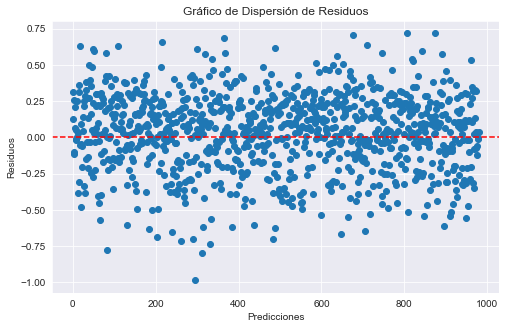

In [278]:
plt.scatter(x=range(len(residuales)), y=residuales)
plt.gcf().set_size_inches(8,5)
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Agregar línea horizontal en y=0
plt.show()

predictions = model.predict(X)

De acuerdo con el gráfico anterior, se encuentra que los residuos, parecieran mostrar un comportamiento constante al rededor de cero, sin embargo pareciera mostrar una  leve concentración en valores superiores a cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [279]:
import statsmodels.api as sm

# Ajusta un modelo auxiliar para explicar la varianza de los residuos
X_auxiliar = X_test  # Puedes utilizar las variables originales o alguna transformación de estas
X_auxiliar = sm.add_constant(X_auxiliar)  # Agrega una constante si es necesario
model_auxiliar = sm.OLS(np.square(residuales), X_auxiliar)
results_auxiliar = model_auxiliar.fit()

# Calcula el estadístico LM para el test de Breusch-Pagan
BP_statistic = results_auxiliar.rsquared
# Calcula el p-valor asociado al estadístico LM
p_valor_BP = results_auxiliar.f_pvalue

# Imprime los resultados
print("Estadístico de Breusch-Pagan:", BP_statistic)
print("P-valor del test de Breusch-Pagan:", p_valor_BP)

Estadístico de Breusch-Pagan: 0.07871791973180509
P-valor del test de Breusch-Pagan: 8.475640489544816e-16


Teniendo en cuenta los resultados del test de Breusch-Pagan, dado un valor p significativamente bajo,  hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo.

In [280]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuales)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 2.0374809484643865


Dado que el valor obtenido para el estadístico de Durbin-Watson es aproximadamente 2.0375, está cerca de 2, pareciera que no hay autocorrelación de primer orden en los residuos. En consecuencia, los residuos parecen ser independientes entre sí.

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

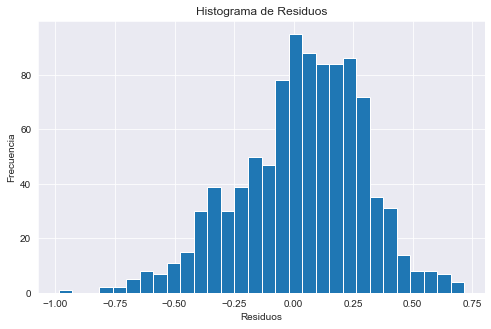

In [281]:
plt.hist(residuales, bins=30)
plt.gcf().set_size_inches(8,5)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

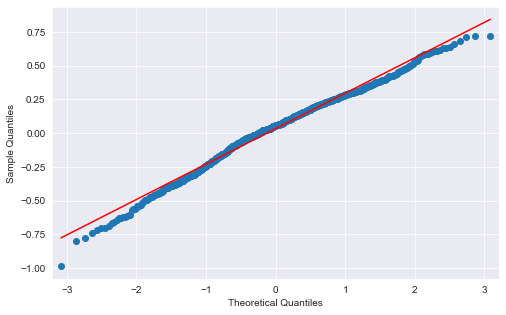

In [282]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuales, line='s')

# Mostrar el gráfico
plt.gcf().set_size_inches(8,5)
plt.show()

In [283]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuales)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9878932480248609
P-valor: 3.1071658287470245e-07
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


Cálculo del modelo de regresion usando Kendall: 

In [284]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación
#Método Kendall
#B0=0 considerando que los datos están estandarizados

betas = RLC(df_scaled, "kendall")
betas
#Los valores de Beta mayores, representan mayor dependencia a la variable

# Imprimir el mensaje en pantalla
print("La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, ")
print("y= "+"β₁" + str(betas[0]) + " + " + "β₂" + str(betas[1]) + " + "+ "β₃" + str(betas[2]) + " + "+ "β₄" + str(betas[3]) +" + "+ "β₅" + str(betas[4]))

La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, 
y= β₁0.03929951889239226 + β₂0.4138869957611103 + β₃-0.02379283098767225 + β₄0.12203927691759384 + β₅-0.4720047863901405


Siendo β₁ asociado a los valores obtenidos por la variable Ácido Cítrico
<br>
β₂ asociado a los valores obtenidos por la variable Azúcar Residual
<br>
β₃ asociado a los valores obtenidos por la variable Dióxido de Azúfre Libre
<br>
β₄ asociado a los valores obtenidos por la variable Dióxido de Azúfre Total
<br>
β₅ asociado a los valores obtenidos por la variable Alcohol

In [285]:
X_test_scaled = scalerX.transform(X_test)

y_test_pred = np.matmul(X_test_scaled, betas)

In [286]:
# Calculo de RMSE Root Mean Squared Error

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("En promedio, las predicciones del modelo tienen un error de aproximadamente:", rmse)

En promedio, las predicciones del modelo tienen un error de aproximadamente: 1.2968506359111867


Considerando que las variables del modelo, están estandarizadas, el RMSE obtenido, indica que en promedio, las predicciones del modelo mediante el método Kendall, están desviadas de los valores reales en alrededor de 1.2969 desviaciones estándar de la variable objetivo (Densidad).

In [287]:
residuales = y_test_pred - scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

#### Validación de los supuestos (Kendall)

Mediante la evaluación de los supuestos del modelo, presentada a continuación, se encuentra que hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo, adicionalmente, se rechaza la hipótesis nula en el test Shapiro-Wilk; Los residuos no siguen una distribución normal.

En resumen, dado que se encuentra evidencia de heterocedasticidad y no se cumple el supuesto de normalidad de los residuos, no es correcto el uso del modelo y tendría que revisarse técnicas de modelado alternativas o ajustes en el modelo para abordar estas deficiencias y mejorar la precisión de las estimaciones.

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes, Promedio de los 𝓔ᵢ= 0 y presentan varianza constante

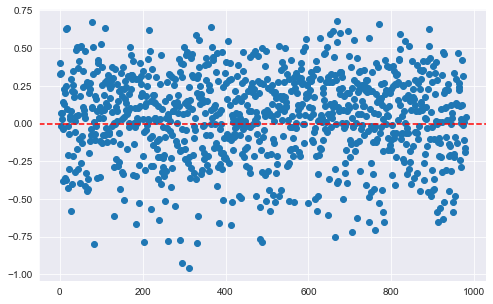

In [288]:
plt.scatter(x=range(len(residuales)), y=residuales)
plt.gcf().set_size_inches(8,5)

plt.axhline(y=0, color='r', linestyle='--')  # Agregar línea horizontal en y=0
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, parecieran mostrar un comportamiento constante al rededor de cero, sin embargo pareciera mostrar una leve concentración en valores superiores a cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [289]:
import statsmodels.api as sm

# Ajusta un modelo auxiliar para explicar la varianza de los residuos
X_auxiliar = X_test  # Puedes utilizar las variables originales o alguna transformación de estas
X_auxiliar = sm.add_constant(X_auxiliar)  # Agrega una constante si es necesario
model_auxiliar = sm.OLS(np.square(residuales), X_auxiliar)
results_auxiliar = model_auxiliar.fit()

# Calcula el estadístico LM para el test de Breusch-Pagan
BP_statistic = results_auxiliar.rsquared
# Calcula el p-valor asociado al estadístico LM
p_valor_BP = results_auxiliar.f_pvalue

# Imprime los resultados
print("Estadístico de Breusch-Pagan:", BP_statistic)
print("P-valor del test de Breusch-Pagan:", p_valor_BP)

Estadístico de Breusch-Pagan: 0.016993546999909848
P-valor del test de Breusch-Pagan: 0.005063412541841041


Teniendo en cuenta los resultados del test de Breusch-Pagan, dado un valor p significativamente bajo, hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo

In [290]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuales)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 2.022273885522051


Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

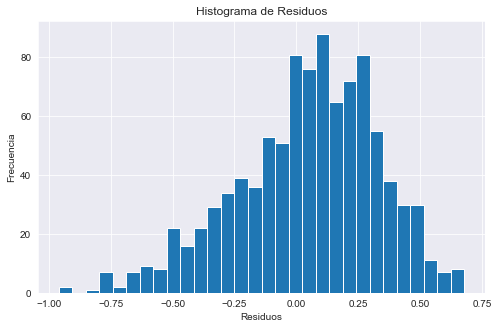

In [291]:
plt.hist(residuales, bins=30)
plt.gcf().set_size_inches(8,5)

plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

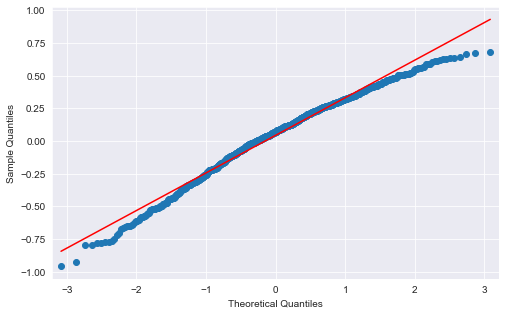

In [292]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuales, line='s')

# Mostrar el gráfico
plt.gcf().set_size_inches(8,5)
plt.show()

In [293]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuales)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9823205650104967
P-valor: 1.5967563982052289e-09
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


Calculo del modelo usando Pearson: 

In [294]:
#A continuación se calculan los coeficientes de regresión mediante la expresión anterior de matriz de correlación
#Método pearson
#B0=0 considerando que los datos están estandarizados

betas = RLC(df_scaled, "pearson")
betas
#Los valores de Beta mayores, representan mayor dependencia a la variable

# Imprimir el mensaje en pantalla
print("La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, ")
print("y= "+"β₁" + str(betas[0]) + " + " + "β₂" + str(betas[1]) + " + "+ "β₃" + str(betas[2]) + " + "+ "β₄" + str(betas[3]) +" + "+ "β₅" + str(betas[4]))

La siguiente es la expresión del modelo calculado, estimando los coeficientes de regresión mediante la matriz de correlación obtenida usando Spearman, 
y= β₁0.05154898889384292 + β₂0.6046284708827587 + β₃-0.08339784307542122 + β₄0.12011899954889196 + β₅-0.46400145920757185


Siendo β₁ asociado a los valores obtenidos por la variable Ácido Cítrico
<br>
β₂ asociado a los valores obtenidos por la variable Azúcar Residual
<br>
β₃ asociado a los valores obtenidos por la variable Dióxido de Azúfre Libre
<br>
β₄ asociado a los valores obtenidos por la variable Dióxido de Azúfre Total
<br>
β₅ asociado a los valores obtenidos por la variable Alcohol

In [295]:
X_test_scaled = scalerX.transform(X_test)

y_test_pred = np.matmul(X_test_scaled, betas) #

In [296]:
# Calculo de RMSE Root Mean Squared Error

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("En promedio, las predicciones del modelo tienen un error de aproximadamente:", rmse)

En promedio, las predicciones del modelo tienen un error de aproximadamente: 1.3863748432263951


Considerando que las variables del modelo, están estandarizadas, el RMSE obtenido, indica que en promedio, las predicciones del modelo mediante el método Pearson, están desviadas de los valores reales en alrededor de 1.38 desviaciones estándar de la variable objetivo (Densidad).

In [297]:
residuales = y_test_pred - scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

#### Validación de los supuestos (Pearson)

Mediante la evaluación de los supuestos del modelo, presentada a continuación, se encuentra que hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo, adicionalmente, se rechaza la hipótesis nula en el test Shapiro-Wilk; Los residuos no siguen una distribución normal.

En resumen, dado que se encuentra evidencia de heterocedasticidad y no se cumple el supuesto de normalidad de los residuos, no es correcto el uso del modelo y tendría que revisarse técnicas de modelado alternativas o ajustes en el modelo para abordar estas deficiencias y mejorar la precisión de las estimaciones.

Supuesto 1 y supuesto 3 y 4: Los residuales son independientes, Promedio de los 𝓔ᵢ= 0 y presentan varianza constante

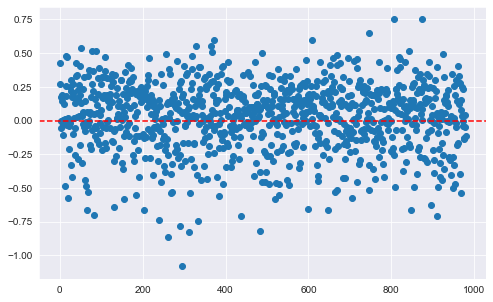

In [298]:
plt.scatter(x=range(len(residuales)), y=residuales)
plt.gcf().set_size_inches(8,5)

plt.axhline(y=0, color='r', linestyle='--')  # Agregar línea horizontal en y=0
plt.show()

De acuerdo con el gráfico anterior, se encuentra que los residuos, parecieran mostrar un comportamiento constante al rededor de cero.

A continuación se proceder a evaluar mediante tests de Breusch-Pagan y Durbin-Watson, si el comportamiento de los residuos presentan o no, heterocedasticidad y autocorrelación.

In [299]:
import statsmodels.api as sm

# Ajusta un modelo auxiliar para explicar la varianza de los residuos
X_auxiliar = X_test  # Puedes utilizar las variables originales o alguna transformación de estas
X_auxiliar = sm.add_constant(X_auxiliar)  # Agrega una constante si es necesario
model_auxiliar = sm.OLS(np.square(residuales), X_auxiliar)
results_auxiliar = model_auxiliar.fit()

# Calcula el estadístico LM para el test de Breusch-Pagan
BP_statistic = results_auxiliar.rsquared
# Calcula el p-valor asociado al estadístico LM
p_valor_BP = results_auxiliar.f_pvalue

# Imprime los resultados
print("Estadístico de Breusch-Pagan:", BP_statistic)
print("P-valor del test de Breusch-Pagan:", p_valor_BP)

Estadístico de Breusch-Pagan: 0.04044358779539037
P-valor del test de Breusch-Pagan: 1.315862938375713e-07


Teniendo en cuenta los resultados del test de Breusch-Pagan, dado un valor p significativamente bajo, hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. Por lo tanto, se concluye que hay heterocedasticidad en los residuos del modelo

In [300]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuos = model.resid

# Calcular el estadístico de Durbin-Watson
statistic = durbin_watson(residuales)

# Imprimir el resultado
print("Estadístico de Durbin-Watson:", statistic)

Estadístico de Durbin-Watson: 1.996266746756021


Dado que el valor obtenido para el estadístico de Durbin-Watson es aproximadamente 2.0375, está cerca de 2, pareciera que no hay autocorrelación de primer orden en los residuos. En consecuencia, los residuos parecen ser independientes entre sí. 

Supuesto 2: Los 𝓔ᵢ presentan una distribución Normal

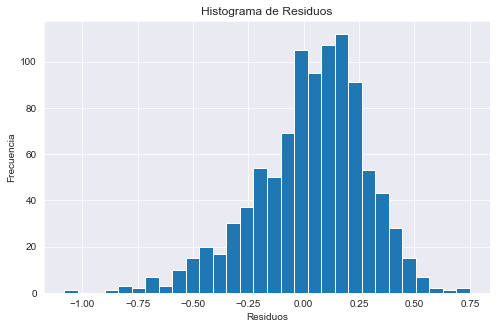

In [301]:
plt.hist(residuales, bins=30)
plt.gcf().set_size_inches(8,5)

plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

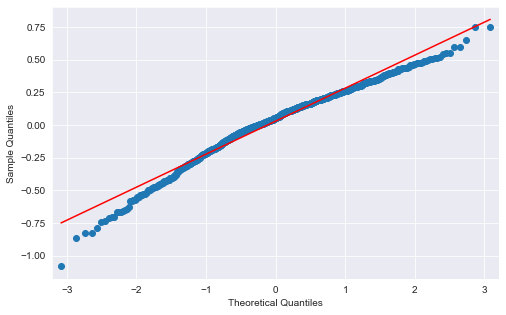

In [302]:
#import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

#  gráfico QQPlot
fig = smg.qqplot(residuales, line='s')

# Mostrar el gráfico
plt.gcf().set_size_inches(8,5)
plt.show()

In [303]:
#Test de Shapiro-Wilk para validación de Normalidad en los residuales

from scipy import stats

shapiro_result = stats.shapiro(residuales)

# Imprimir el resultado del test
print("Estadístico de Shapiro-Wilk:", shapiro_result.statistic)
print("P-valor:", shapiro_result.pvalue)

# Interpretar el resultado del test
alpha = 0.05
if shapiro_result.pvalue > alpha:
    print("No se puede rechazar la hipótesis nula. Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9757908607053407
P-valor: 1.0485793225894429e-11
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


Construimos el modelo con las variables transformadas: 

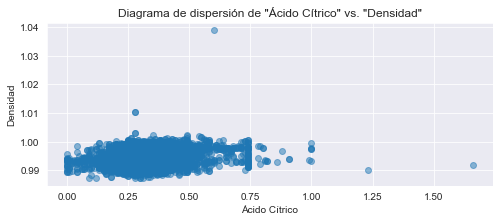

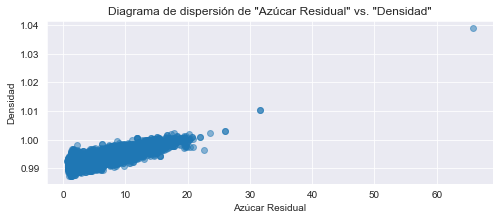

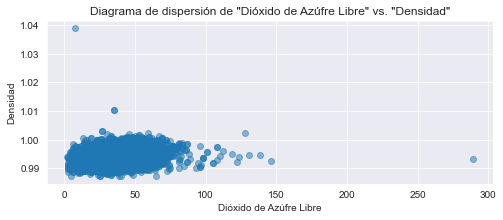

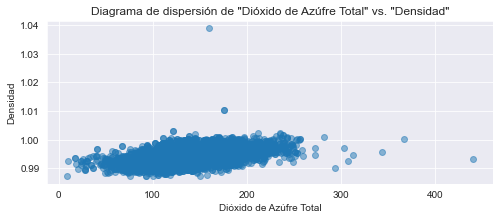

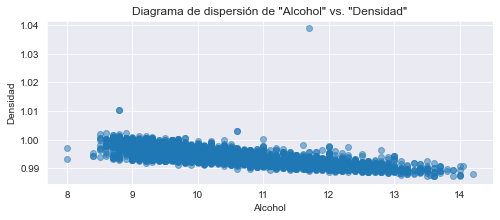

In [304]:
import matplotlib.pyplot as plt

# Obtener solo las columnas de df_scaled que deseas graficar
variables = df3.drop("Densidad", axis=1)

# Iterar sobre las columnas y graficar cada una contra la variable "Densidad"
for column in variables.columns:
    plt.figure(figsize=(8, 3))
    plt.scatter(df3[column], df3["Densidad"], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.title(f'Diagrama de dispersión de "{column}" vs. "Densidad"')
    plt.grid(True)
    plt.show()

In [305]:
#Modelo Alcohol vs Densidad sin considerar transformación de variable

import statsmodels.api as sm

# Ajustar el modelo de regresión lineal
X = df3['Alcohol']   # Variable explicativa
y = df3['Densidad']      # Variable objetivo

# Agregar intercepto al conjunto de datos
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7613.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:33:30   Log-Likelihood:                 23816.
No. Observations:                4898   AIC:                        -4.763e+04
Df Residuals:                    4896   BIC:                        -4.761e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0140      0.000   4407.871      0.0

In [306]:
df3['Alcohol_inv'] = 1 / df3['Alcohol']

In [307]:
#Modelo Alcohol vs Densidad considerando trasnformación de Variable 1/Alcohol

import statsmodels.api as sm

# Ajustar el modelo de regresión lineal
X = df3['Alcohol_inv']   # Variable explicativa
y = df3['Densidad']      # Variable objetivo

# Agregar intercepto al conjunto de datos
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     8043.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:33:30   Log-Likelihood:                 23899.
No. Observations:                4898   AIC:                        -4.779e+04
Df Residuals:                    4896   BIC:                        -4.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9731      0.000   4153.950      

A partir de la transformación realizada la variable "Alcohol", se realiza un análisis comparativo de modelos OLS con, y sin transformación, de donde se tiene que:

Modelo 1 (sin transformación de la variable 'alcohol'):

$Adj - R^2$: 0.609

Coeficiente para la variable Alcohol: -0.0019

<br>
Modelo 2 (transformando la variable 'Alcohol'):

$Adj - R^2$: 0.622
Coeficiente para la variable Alcohol_inv: 0.2166

<Bbr>
El modelo 2 tiene un R-cuadrado ajustado ligeramente mayor (0.622) en comparación con el modelo 1 (0.609), lo que sugiere que explica una mayor proporción de la variabilidad en la variable de respuesta (Densidad). Además, el coeficiente para la variable Alcohol_inv en el modelo 2 es significativamente diferente de cero y tiene un efecto positivo en la variable de respuesta.

Por lo tanto, en base a estos resultados, se podría concluir que el MODELO 2 es mejor en términos de ajuste y explicación de la variabilidad en la variable de respuesta.

### Ejercicio de regresion lineal simple 

El ejercicio que nos concierne en este nuevo apartado se refiere a un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión.

El dataset nos da información acerca de los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades) de un producto en un mercado específico:  

- __TV__: Gasto (miles de dólares) en publicidad en televisión.  
- __Radio__: Gasto (miles de dólares) en publicidad en radio.  
- __Newspaper__: Gasto (miles de dólares) en publicidad en periódicos.  
- __Sales__: Número de unidades vendidas (en miles)  

In [308]:
#Cargamos el dataset y entendemos su estructura

publicidad = pd.read_csv("D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Analisis Cuantitivo\Trabajo 1\publicidad.csv")
publicidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Nos damos cuenta que existe una columna adicional de las declaradas en el enunciado del ejercicio, con nombre 'Unnamed: 0'. Procedemos a llamar el metodo 'head' con el fin de visualizar la estructura del df y qué datos registra esta columna. 

In [309]:
publicidad.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


Al llamar a los primeros 10 registros, nos damos cuenta que la columna 'Unnamed : 0' es un contador de registros que inicia en 1. Sin embargo, no es relevante para el ejercicio aquí descrito, por lo que procedemos a eliminarla. 

In [310]:
publicidad.drop('Unnamed: 0', axis= 1,inplace= True) # Eliminamos la columna
publicidad.head() #Revisamos si quedó grabado

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Procedemos a graficar la distribución de las variables y la relación entre pares:

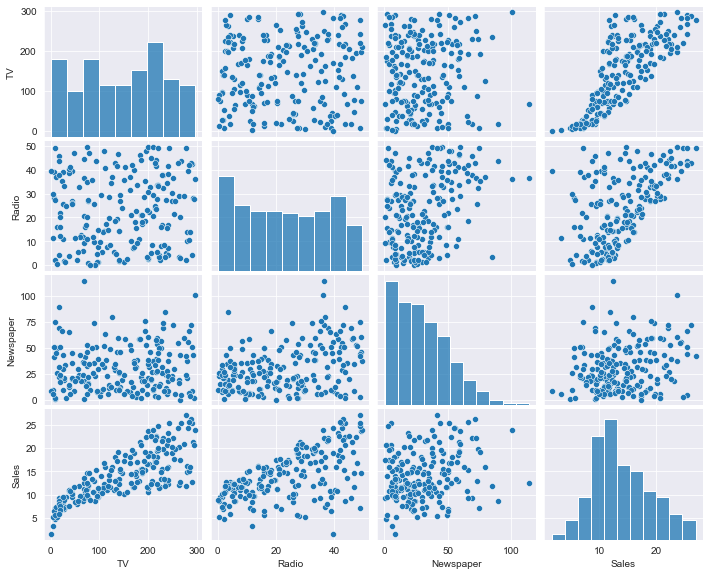

In [311]:
#Graficas scatter matrix y dimensionamos
sn.pairplot(publicidad)
plt.gcf().set_size_inches(10,8)

Al graficar la scatter matrix podemos evidenciar que: 

- La relación entre el gasto en publicidad en TV vs las Ventas parece de dependencia positiva; sin embargo, conforme el gasto en publicidad aumenta, parece haber mayor variabilidad de los datos. Nos puede inidicar la presencia de heterocedasticidad. 
- La relacion entre el gatos en publicidad en Radio vs las Ventas también parece presentar una dependencia positiva como en el apartado anterior, aunque más leve y con una mayor dispersión en los puntos. 
- Entre el gasto en prensa y las ventas no parece haber una dependencia notoria, existe una mayor dispersión de los datos. No obstante, se debe hacer toda la estadística para cuantificar las correlaciones entre las variables. 


De acuerdo a lo anterior, procedemos a calcular el coeficiente de correlación entre todas las variables y las graficamos mediante un mapa de calor 

In [312]:
import plotly.express as px

corr_matrix = publicidad.corr() #Construimos la matriz de correlaciones

print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


In [313]:
#Graficamos el mapa de calor interactivo
fig = px.imshow(corr_matrix)
fig.show()

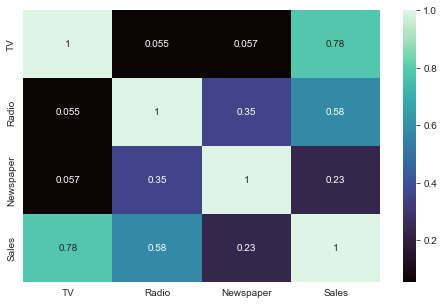

In [314]:
sn.heatmap(corr_matrix, cmap="mako", annot=True)
plt.gcf().set_size_inches(8,5)

Teniendo en cuenta los resultados arrojados, podemos corroborar las afirmaciones anteriores: la variable __"Sales"__ presenta una relacion directa con las tres variables independientes (__“TV”__, __“Radio”__, __“Newspaper”__), siendo TV la más alta con una fuerte correlacion de 0.78, seguido de Radio con una correlacion de 0.57 y prensa, con una correlación débil de 0.22.

Con el fin de adelantar un modelo de regresión simple, y siendo coherentes con los resultados del punto anterior, planteamos el modelo donde __"Sales"__ actúa como variable dependiente y __TV__ como variable explicativa, siendo que es la que mayor correlación presenta. Así, el modelo: 

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}TV$$

In [315]:
#Corremos el modelo con la interacción eliminando la variable categórica Ind como predictor solo
TV = publicidad[['TV']].assign(const=1)
VTA = publicidad['Sales']

model_pub = sm.OLS(VTA,TV)

results_pub = model_pub.fit()
print(results_pub.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        19:33:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0475      0.003     17.668      0.0

Al correr el modelo se calcula el valor de los coeficientes, que permite estimar la función de la recta como: 

$$\hat{y} = 7.0326 + 0.0475*TV$$

Con un $R^2$ del 0.612. Es decir, el modelo ajusta a los datos en un 61.2%, o lo que es lo mismo, el modelo puede explicar el 61.2% de la variablidad de la variable respuesta. 

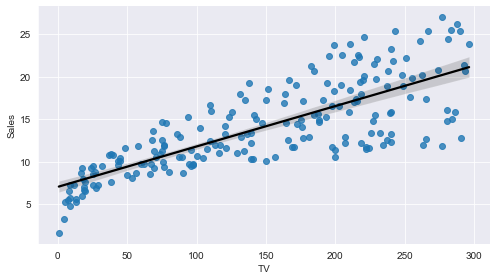

In [316]:
#Graficamos la dispersión de las variables con la linea de regresión
sn.lmplot(data=publicidad, x='TV', y='Sales', line_kws={'color':'black'}, palette='mako', height=4, aspect=7/4)

Hemos hecho explicito el modelo de regresión que mejor se ajusta a los datos. Ahora, si quisieramos predecir la venta que generarían 5 nuevos anuncios en la TV, ¿qué nos arrojaría el modelo? Primero, generemos 5 nuevos datos al azar dentro del rango actual de los datos. 

In [317]:
#Calculamos las estadísticas descriptivas de la variable independiente
publicidad['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [318]:
import random

#Genera una lista con numeros al azar dentro del rango del valor minimo y el valor máximo

random_list = [] #lista vacía

#Itero la generación del número al azar y lo guardo en lista
for i in range(0, 5):
    x = round(random.uniform(0.7, 296.4), 2)
    random_list.append(x)

print(random_list)

[175.8, 87.93, 241.36, 175.45, 249.72]


Convertimos el nuevo set de datos en un df para hacer más fácil su lectura y aplicación. 

In [319]:
#Se crea un DF a partir de la lista para permitir el cálculo
tv = pd.DataFrame(np.array(random_list)).assign(const=1)
tv

,0,const
0,175.80,1
1,87.93,1
2,241.36,1
3,175.45,1
4,249.72,1


Generamos los $\hat{y}$ a partir de los nuevos datos y calculamos el intervalo de confianza.

In [320]:
#Con la data generada arriba se predicen las siguientes ventas
sales_hat = results_pub.predict(tv)
print(sales_hat)

0    15.389535
1    11.212490
2    18.506037
3    15.372897
4    18.903443
dtype: float64


In [321]:
#Calculamos el intervalo de confianza del 95%
import scipy.stats as st
st.t.interval(df=len(sales_hat)-1, loc=np.mean(sales_hat), scale=st.sem(sales_hat), confidence=0.95)

(12.033705452340925, 19.72005569760285)

De esta manera,si aplicamos el modelo de regresión elegido al set de datos generados en el apartado anterior, se espera que en promedio se reporten ventas entre el 7.7 y 18.65 unidades con una confianza del 95%.

### Ejercicio de regresión lineal múltiple

Se desea predecir la resistencia a la compresión del concreto (Concrete compressive strength) en función de diferentes variables predictoras como el cemento (Cement), la escoria (Slag), la ceniza volante (Fly ash), el agua (Water), el superplastificante (Superplasticizer), el agregado grueso (Coarse aggregate) y el agregado fino (Fine aggregate). Para ello se dispone de un conjunto de datos con 1030 observaciones. Se desea construir un modelo de regresión lineal múltiple para predecir la resistencia a la compresión del concreto en función de las variables predictoras.

In [322]:
#Importar el data set
concrete = pd.read_excel("D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Analisis Cuantitivo\Trabajo 1\Concrete_Data.xls",sheet_name='Sheet1')

Entender la estructura y características del dataset.

In [323]:
concrete.shape
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Con el fin de simplificar el ejercicio, procedemos a renombrar las columnas. 

In [324]:
headers = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength']
concrete.columns = headers
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Aprovechamos para graficar la distribución de las variables y su relación entre pares a través de una scatter matrix. 

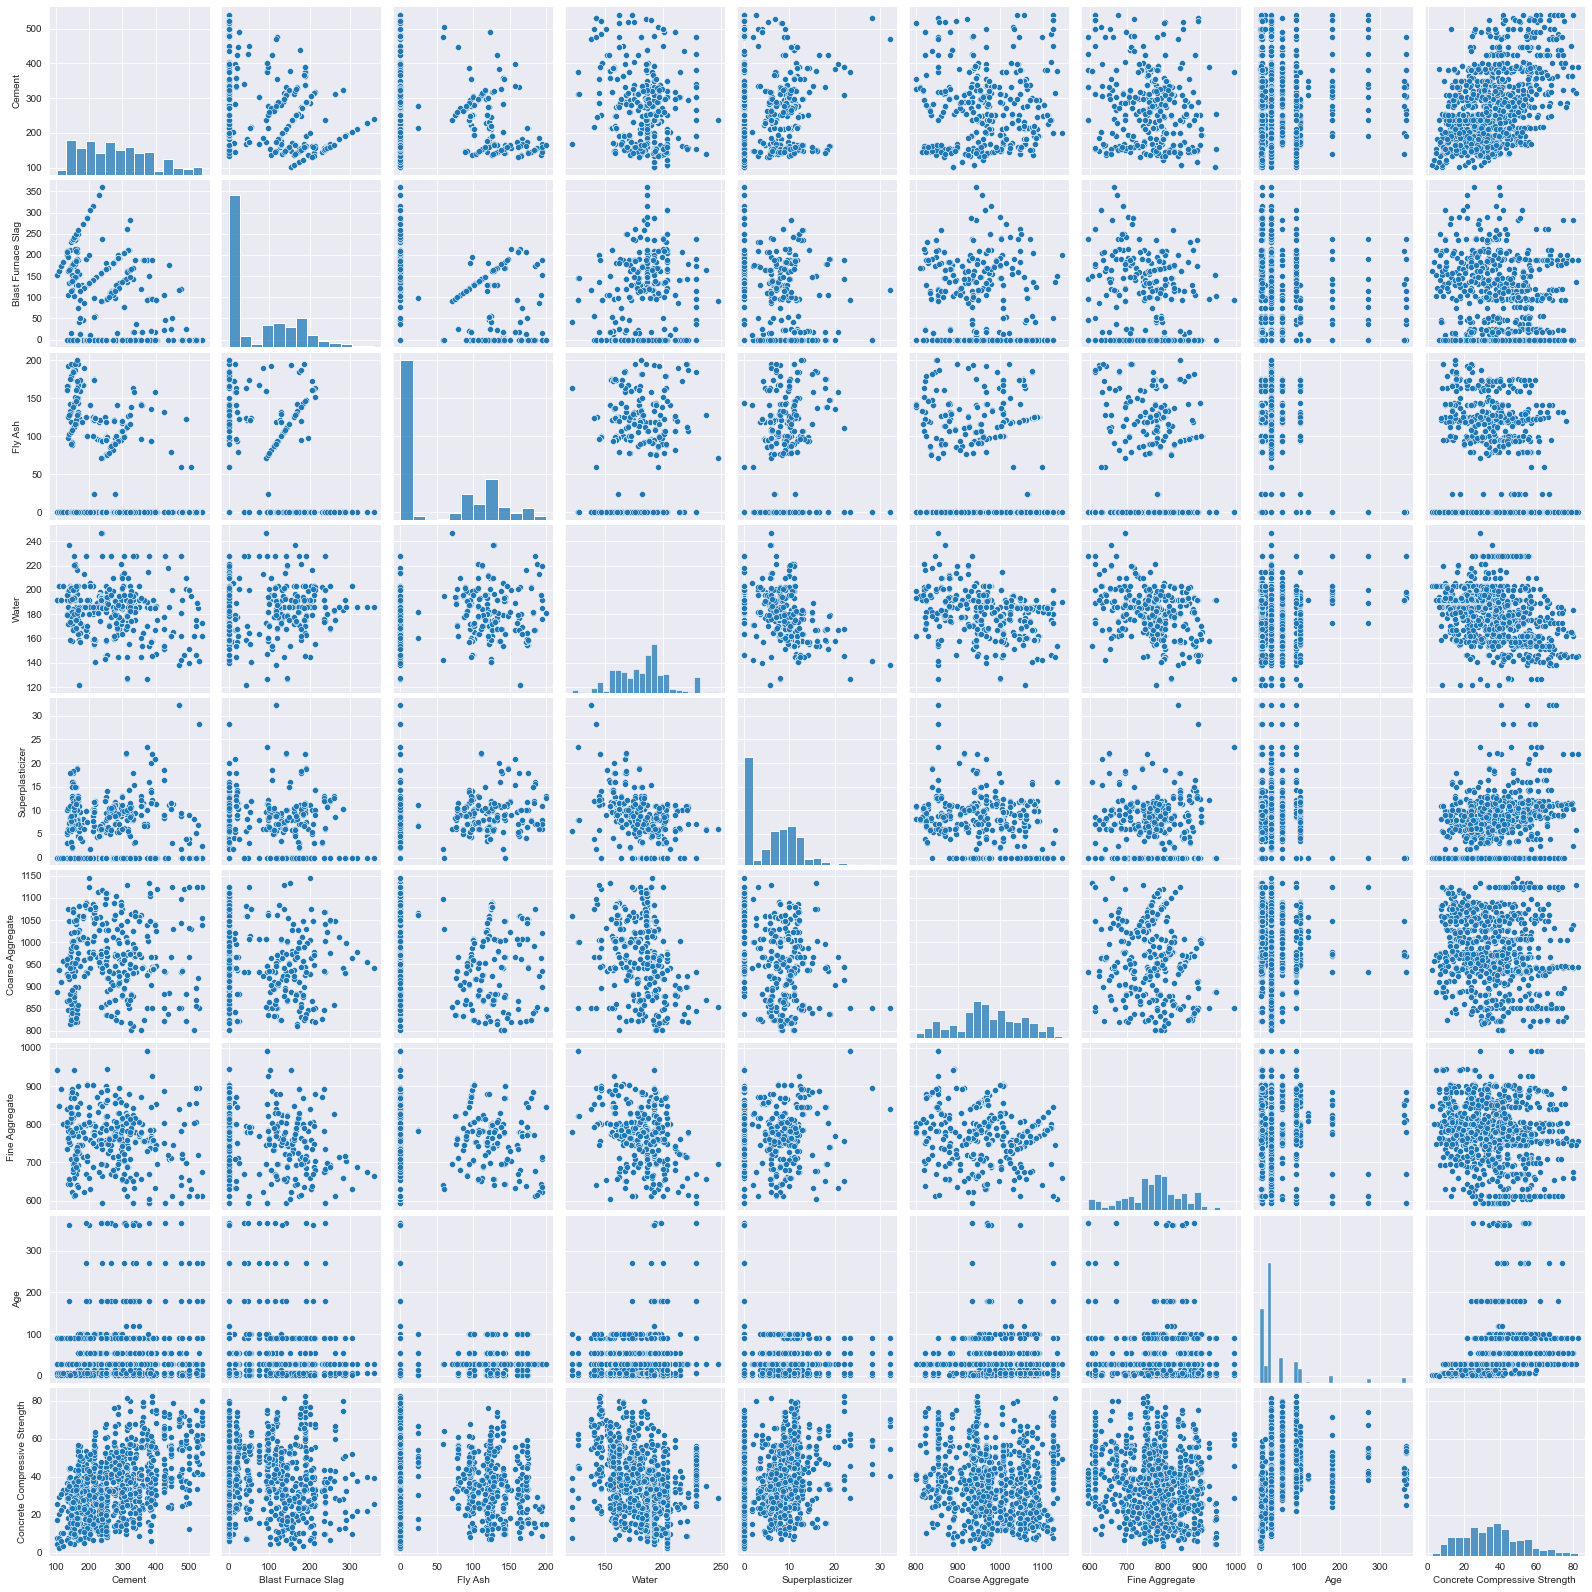

In [325]:
#Graficas scatter matrix y dimensionamos
sn.pairplot(concrete)


La anterior grafica nos permite evidenciar: 

- La variable dependiente __'Cement Compressive Strength'__ parece tener una relación de dependencia positiva con las variables __'Cement'__ y __'Superplasticizer'__, y una dependencia negativa con la variable __'Water'__. La relacion de dependencia de __'Cement Compressive Strength'__  con las demás variables no es tan aparente, por lo que debemos calcular la metrica de correlaciones para conocer la fuerza de esa relación. 

- Algunos de los atributos muestran cierta relación de dependencia: __'Water'__ & __'Superplasticizer'__ parecen tener una relación de dependencia negativa, así como la primera con __'Coarse Agregate'__. Para la relación de las demás variables independientes no podemos acercarnos a una conclusión sin calcular la matriz de correlación que se propone en el punto anterior. 

Por lo mismo, procedemos a generar una matriz de correlación y el respectivo gráfico de mapa de calor: 

In [326]:
corr_concrete = concrete.corr() #Construimos la matriz de correlaciones
corr_concrete

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete Compressive Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [327]:
#Graficamos el mapa de calor interactivo
fig = px.imshow(corr_concrete)
fig.show()

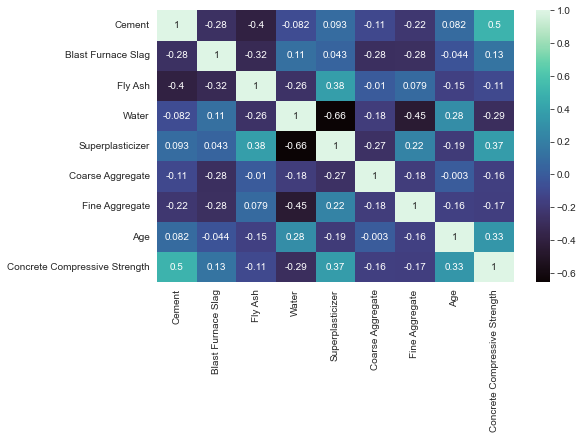

In [328]:
sn.heatmap(corr_concrete, cmap="mako", annot=True)
plt.gcf().set_size_inches(8,5)

El apartado anterior nos permite corroborar lo inferido en la grafica de _scatter matrix_:

- La variable dependiente __'Concrete Compressive Strength'__ en efecto presenta una relación de dependencia positiva moderada de 0.49 con el componente 1 __'Concrete'__ y dependencia débil de 0.36 con __'Superplasticizer'__, así como con __'Age'__ con un 0.32 de correlación. Además, presenta una relación de dependencia negativa con la variable __'Water'__ de 0.28. Presenta una relación de dependencia debil con los demás atributos. 

Una vez conocemos la relación entre las variables, proponemos un modelo de regresión múltiple que iremos refinando conforme identificamos las variables significativas. 

In [329]:
X = concrete.drop('Concrete Compressive Strength', axis=1).assign(const=1)
Y = concrete['Concrete Compressive Strength']

mod = sm.OLS(Y,X)
mod_results = mod.fit()
print(mod_results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete Compressive Strength   R-squared:                       0.615
Model:                                       OLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     204.3
Date:                           Sun, 28 Apr 2024   Prob (F-statistic):          6.76e-206
Time:                                   19:33:46   Log-Likelihood:                -3869.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1021   BIC:                             7800.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

Al correr el modelo, vemos que las variables __'Coarse Aggregate'__ & __'Fine Aggregate'__ arrojan un p-valor mayor a 0.05, por lo que podríamos descartarlas al no ser significativas para el modelo. Corremos nuevamente el modelo, deshaciendonos de ambas variables. El modelo se ajusta un 61.2% a los datos, o lo que es lo mismo, explica el 61% de la variabilidad de los datos. 

In [330]:
X = concrete.drop(['Concrete Compressive Strength', 'Coarse Aggregate', 'Fine Aggregate'], axis=1).assign(const=1)
Y = concrete['Concrete Compressive Strength']

mod = sm.OLS(Y,X)
mod_results = mod.fit()
print(mod_results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete Compressive Strength   R-squared:                       0.614
Model:                                       OLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     271.2
Date:                           Sun, 28 Apr 2024   Prob (F-statistic):          1.78e-207
Time:                                   19:33:47   Log-Likelihood:                -3871.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1023   BIC:                             7791.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

Al eliminar las variables __'Coarse Aggregate'__ & __'Fine Aggregate'__ vemos que los demás atributos se mantienen significativos; sin embargo, el $Adj. R^2$ no mejora, indicandonos que estas variables no añadían distorsión adicional al modelo ni explicaban parte de la variabilidad de los datos. 

No obstante, al usar los criterios de información podemos comparar ambos modelos y discernir sobre su calidad: el criterio de Akaike no muestra una mejora, sin embargo, el criterio de Bayes presenta una mejoría en el segundo modelo, pasando de 7800 a 7791. Podemos así concluir que el segundo modelo, donde todas las variables son significativas y presenta un ajuste del 61.2%, es relativamente de mejor calidad que el primer modelo, donde se usan todas los atributos disponibles.

#### Validacion de supuestos del modelo

Una vez planteado el modelo, procedemos a validar cada uno de los supuestos del modelo, 

1. Iniciamos con la validación de la independencia de los errores. Adelantamos el análisis gráfico con correlogramas, seguido de las pruebas formales. 

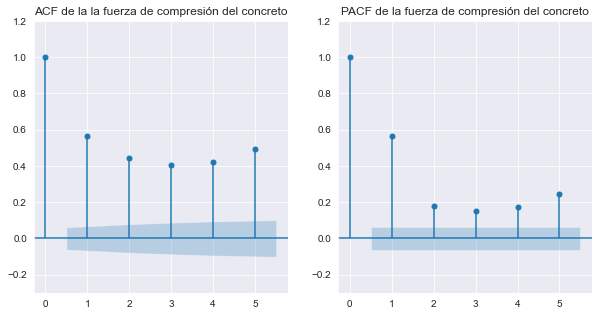

In [331]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Test 1
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_acf(Y, ax=ax[0], lags=5, title="ACF de la la fuerza de compresión del concreto", alpha=0.05)
plot_pacf(Y, ax=ax[1], lags=5, title="PACF de la fuerza de compresión del concreto", alpha=0.05)

ax[0].set_ylim([-0.3, 1.2])
ax[1].set_ylim([-0.3, 1.2])

plt.subplots_adjust()
plt.show()


Al construir el grafico de autocorrelación simple y autocorrelación parcial de la variable dependiente, aparentemente vemos que, con un lag de 5 datos, cada uno de ellos es significativo y nos llevaría a pensar que no existe independencia de los errores. Además, al correr el modelo nos arroja un valor de Durbin - Watson de 1.286, alejado del 2 ideal, lo que nos reforzaría la idea de autocorrelación. 

Corremos la prueba de Breusch - Godfrey definiendo el método y presentando una tabla de validación de hipótesis, que se definen así: 

$$ H_0: \rho(\epsilon_{i}, \epsilon_{i+1}) = 0 \\
H_1: \rho(\epsilon_{i}, \epsilon_{i+1}) \neq 0 $$

In [332]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan, het_white

# Test 3
def test_breusch_godfrey(model_results, maxlags):
    list = []

    for i in range(1, maxlags+1):
        values = acorr_breusch_godfrey(model_results, nlags=i)
        list.append([i, values[0], values[1]])
    
    table = pd.DataFrame(list, columns=["lags", "LM", "pvalue"])
    table.set_index("lags", inplace=True)
    
    # P-value < pvalue 
    table[f"pv<0.1"] = table["pvalue"]<0.1
    table[f"pv<0.05"] = table["pvalue"]<0.05
    table[f"pv<0.01"] = table["pvalue"]<0.01

    # Rounding
    table["LM"] = np.round(table["LM"], 3)
    table["pvalue"] = np.round(table["pvalue"], 3)

    return table


# La hipotesis nula es de no autocorrelacion
# Se rechaza la no autocorrelacion hasta 5 rezagos. 
test_breusch_godfrey(mod_results, maxlags=5)

,LM,pvalue,pv<0.1,pv<0.05,pv<0.01
lags,,,,,
1,131.737,0.0,True,True,True
2,138.174,0.0,True,True,True
3,143.549,0.0,True,True,True
4,170.467,0.0,True,True,True
5,215.916,0.0,True,True,True


Al correr el test de Breusch - Godfrey hasta en 5 rezagos podemos rechazar la hipótesis nula y concluir que los errores no son independiente, existe __autocorrelación__.

2. Continuamos con validación de la varianza constante de los errores. Al igual que en el apartado pasado, iniciamos con una análisis gráfico y procedemos a correr las pruebas formales. 

Text(0, 0.5, 'Residuo')

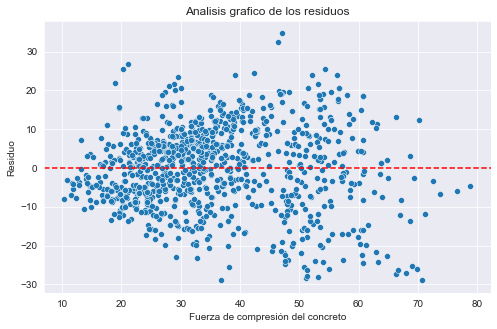

In [333]:
# Test gráfico
y_hat = mod_results.predict(X)
residuos = mod_results.resid

sn.scatterplot(x=y_hat, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.gcf().set_size_inches(8,5)
plt.title("Analisis grafico de los residuos")
plt.xlabel("Fuerza de compresión del concreto")
plt.ylabel("Residuo")

Al graficar el comportamiento de las predicciones con los errores no es muy claro si existe homocedasticidad; sin embargo, conforme aumenta la variable y los errores se ven más dipersos. Por lo mismo, adelantamos las pruebas formales de Breusch - Pagan y White con el fin de corroborar si existe o no heterocedasticidad. Por lo mismo, planteamos la prueba de hipótesis: 

$$ H_0: \mathbb{V}(\epsilon_{i}) = Constante \\
H_1: \mathbb{V}(\epsilon_{i})  \neq Constante $$

In [334]:
# Test 2
BP_test = het_breuschpagan(residuos, mod_results.model.exog)
BP_test = np.round(BP_test, 3)

# H0: homocedasticidad en los errores
# H1: heterocedasticiadad en los erroes

print(f"El estadistico Breusch - Pagan es {BP_test[0]} y el p-value es {BP_test[1]}")

El estadistico Breusch - Pagan es 139.182 y el p-value es 0.0


In [335]:
#Test 3
white_test = het_white(residuos, mod_results.model.exog)
labels = ['Estadístico White', 'p-value', 'F-Statistic', 'F-Test p-value']
white_test = np.round(white_test, 3)

# H0: homocedasticidad en los errores
# H1: heterocedasticiadad en los erroes

print(dict(zip(labels, white_test)))


{'Estadístico White': 258.69, 'p-value': 0.0, 'F-Statistic': 12.447, 'F-Test p-value': 0.0}


Ambas pruebas nos dan un p-value menor a 0.05, lo que nos lleva a rechazar la hipótesis nula y concluir que __el modelo presenta heterocedasticidad__, es decir, la varianza de los errores no es constante.  

3. Ahora, procedemos a probar si los datos se distribuyen o no de manera normal con las dos pruebas de bondad de ajuste de D'Angostino y Jarque Bera. 

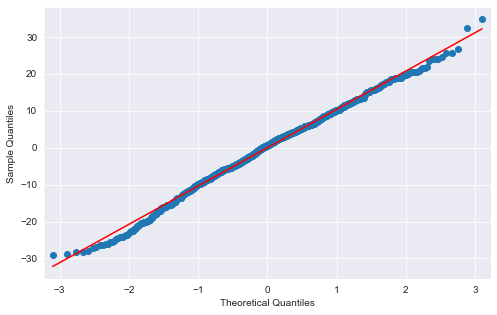

In [336]:
import statsmodels.api as sm

#Test gráfico de normalidad
figure = sm.qqplot(residuos, line = 's')

plt.gcf().set_size_inches(8,5)
plt.show()

Al graficar los residuos, no nos da información aparente para descartar la normalidad de los residuos. Además, el p-valor de la prueba Jarque Bera es mayor a 0.05, lo que no nos da información suficiente para rechazar la hipótesis nula ni descartar la distribución normal de los residuos. Sin embargo, procedemos con el test D'Angostino

In [337]:
from scipy.stats import normaltest

#Test 2 de bondad de ajuste
k2, p_value = normaltest(residuos)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 5.233211197298024, p-value = 0.0730504048541871


Como vemos con el test de Jarque - Bera, el p - valor de la prueba de D'Angostino está por encima del 0.05, lo que conlleva a aceptar la hipótesis nula de normalidad de los residuos. 

Ahora, hecha la validad de los supuestos, podemos plantearnos correr un modelo robusto como Mínimos Cuadrados Generalizados y revisar si esto nos corrige los errores aquí presentados, principalmente la heterocedasticidad. 

In [338]:
X_r = concrete.drop(['Concrete Compressive Strength', 'Coarse Aggregate', 'Fine Aggregate'], axis=1).assign(const=1)
y_r = concrete['Concrete Compressive Strength']

model_r = sm.GLS(y_r, X_r)
res = model_r.fit()
print(res.summary())

                                  GLS Regression Results                                 
Dep. Variable:     Concrete Compressive Strength   R-squared:                       0.614
Model:                                       GLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     271.2
Date:                           Sun, 28 Apr 2024   Prob (F-statistic):          1.78e-207
Time:                                   19:33:47   Log-Likelihood:                -3871.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1023   BIC:                             7791.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

Al correr los mínimos cuadrados generalizados vemos que los estadísticos del modelo no cambian: 

$ Adj - R^2 = 0.612 $ Lo que implica que el modelo no ajusta mejor la variación de los datos. El modelo sigue siendo significativo para explicar el comportamiento de la variable dependiente, pero los criterios de infromación de Akaike no mejoran, lo que significa que este modelo no es mejor al planteado en el apartado anterior. 

En cuanto a los supuestos sobre el modelo, vemos que la métrica de Durbin - Watson no se modifica, lo que implica que GLS no logra corregir el problema de acutocorrelación. Se sigue cumpliendo Jarque - Bera. Corremos las pruebas para Breusch - Pagan y White para validar homocedasticidad.  

In [339]:

resid_r = res.resid
# Test 2
BP_r = het_breuschpagan(resid_r, res.model.exog)
BP_r = np.round(BP_r, 3)

# H0: homocedasticidad en los errores
# H1: heterocedasticiadad en los erroes

print(f"El estadistico Breusch - Pagan es {BP_r[0]} y el p-value es {BP_r[1]}")

El estadistico Breusch - Pagan es 139.182 y el p-value es 0.0


In [340]:
#Test 3
white_test_r = het_white(resid_r, res.model.exog)
labels = ['Estadístico White', 'p-value', 'F-Statistic', 'F-Test p-value']
white_test_r = np.round(white_test_r, 3)

# H0: homocedasticidad en los errores
# H1: heterocedasticiadad en los erroes

print(dict(zip(labels, white_test_r)))

{'Estadístico White': 258.69, 'p-value': 0.0, 'F-Statistic': 12.447, 'F-Test p-value': 0.0}


A pesar de correr el modelo generalizado, evidenciamos que ambas pruebas nos dan un p-value menor a 0.05, lo que nos lleva nuevamente a rechazar la hipótesis nula y concluir que __el modelo presenta heterocedasticidad__, es decir, la varianza de los errores no es constante. 